# Chapter 5: Modeling distributions

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np

import thinkstats2
import thinkplot

## Reading

Exponential distribution:

In [3]:
?thinkstats2.RenderExpoCdf

Signature: thinkstats2.RenderExpoCdf(lam, low, high, n=101)
Docstring:
Generates sequences of xs and ps for an exponential CDF.

lam: parameter
low: float
high: float
n: number of points to render

returns: numpy arrays (xs, ps)
File:      ~/git/2022-summer-homeschool/thinkstats2/thinkstats2.py
Type:      function


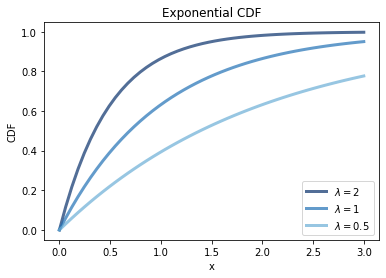

In [4]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")

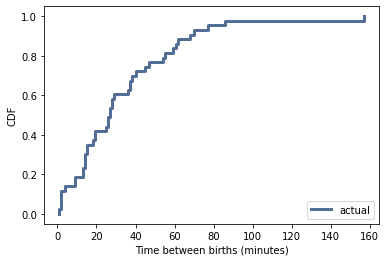

In [6]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

In [7]:
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [8]:
diffs.head()

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

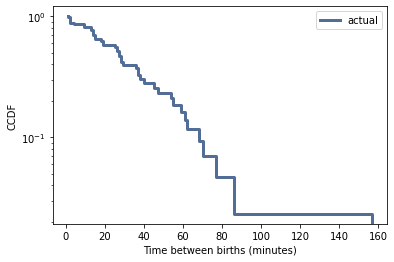

In [9]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Time between births (minutes)",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

Normal distribution:

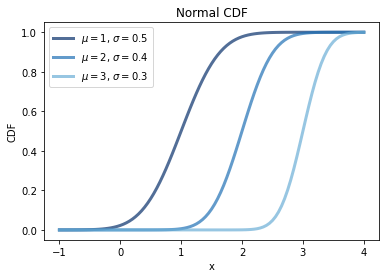

In [10]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

In [11]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [12]:
import nsfg
import first

In [13]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

In [14]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print("Mean, Var", mu, var)

Mean, Var 7.280883100022579 1.545212570354488


In [15]:
?thinkstats2.TrimmedMeanVar

Signature: thinkstats2.TrimmedMeanVar(t, p=0.01)
Docstring:
Computes the trimmed mean and variance of a sequence of numbers.

Side effect: sorts the list.

Args:
    t: sequence of numbers
    p: fraction of values to trim off each end

Returns:
    float
File:      ~/git/2022-summer-homeschool/thinkstats2/thinkstats2.py
Type:      function


Sigma 1.2430657948614336


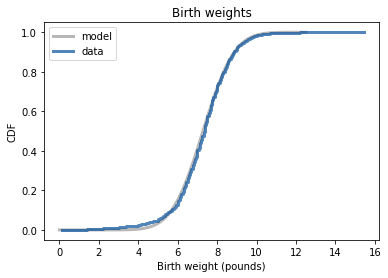

In [16]:
# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

Normal probability plot:

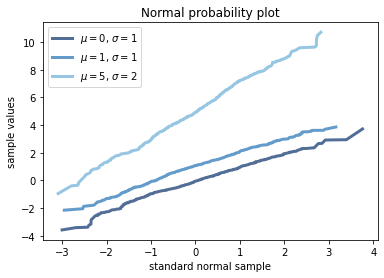

In [17]:
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

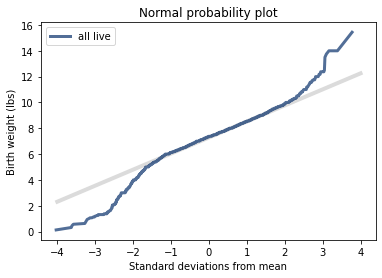

In [18]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

Is the deviation in the left tail due to pre-term babies?

In [19]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

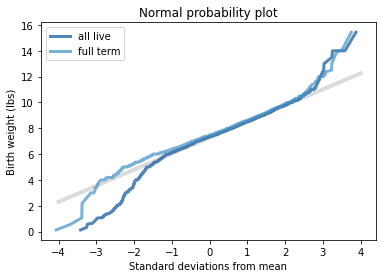

In [20]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label="full term")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

Lognormal model:

In [21]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [22]:
import brfss

df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [23]:
def MakeNormalModel(weights):
    """
    Plots a CDF with a normal model.
    `weights`: sequence
    """
    
    cdf = thinkstats2.Cdf(weights, label="weights")
    
    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print(f"n, mean, std: {len(weights)}, {mean}, {std}")
    
    # x range for plot
    xmin = mean - 4 * std
    xmax = mean + 4 * std
    
    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std: 398484, 78.59599565702814, 17.754555191798296


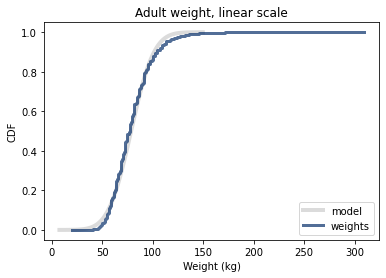

In [24]:
MakeNormalModel(weights)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="lower right",
)

The normal model does not fit adult weights very well.

n, mean, std: 398484, 1.884660713731975, 0.0962358025915174


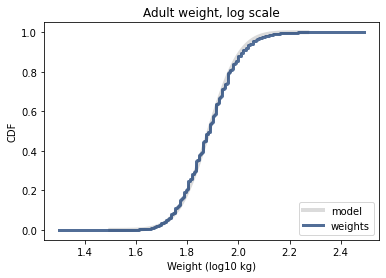

In [25]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(
    title="Adult weight, log scale",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="lower right",
)

The log-normal model fits better.

In [26]:
def MakeNormalPlot(weights):
    """
    Generates a normal probability plot of weights.
    `weights`: sequence
    """
    
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)
    
    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")

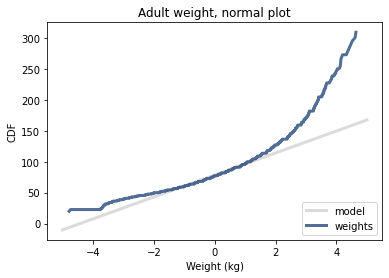

In [27]:
MakeNormalPlot(weights)
thinkplot.Config(
    title="Adult weight, normal plot",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="lower right",
)

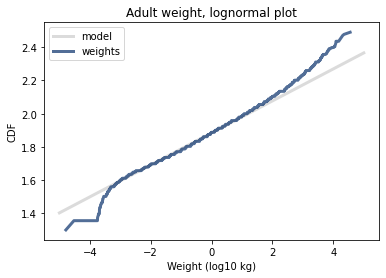

In [28]:
MakeNormalPlot(log_weights)
thinkplot.Config(
    title="Adult weight, lognormal plot",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

Pareto distribution:

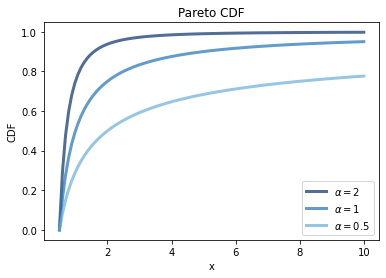

In [29]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [30]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")

In [31]:
import populations

pops = populations.ReadData()
print("Number of cities/towns", len(pops))

Number of cities/towns 19515


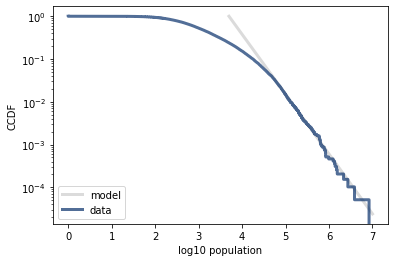

In [32]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label="data")
cdf_log = thinkstats2.Cdf(log_pops, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 population", ylabel="CCDF", yscale="log", loc="lower left"
)

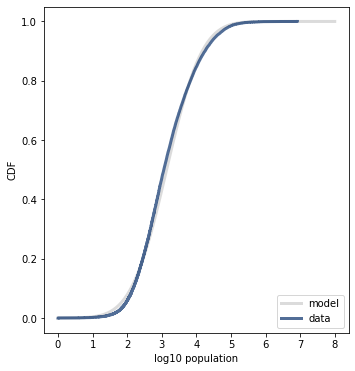

In [33]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 population", ylabel="CDF", loc="lower right")

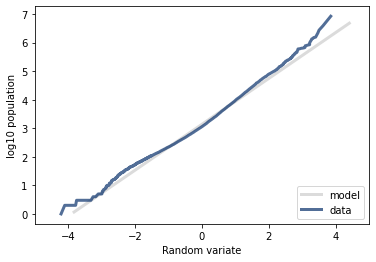

In [34]:
thinkstats2.NormalProbabilityPlot(log_pops, label="data")
thinkplot.Config(xlabel="Random variate", ylabel="log10 population", xlim=[-5, 5])

Random variates:

In [35]:
import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1 - p) / lam
    return x

In [36]:
t = [expovariate(lam=2) for _ in range(1000)]

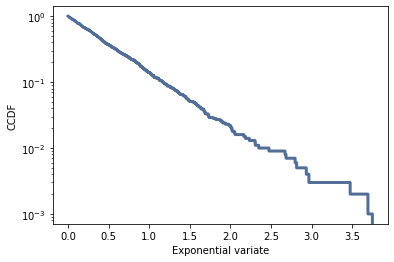

In [37]:
cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Exponential variate", ylabel="CCDF", yscale="log")

## Exercises

**Exercise:** Write a function that generates a Pareto variate. Generate a sample and plot its complementary CDF on a log-log scale. Does it look like a straight line?

In [38]:
def pareto_variate(alpha, xm):
    p = random.random()
    x = (1 - p)**(-1 / alpha) * xm
    return x

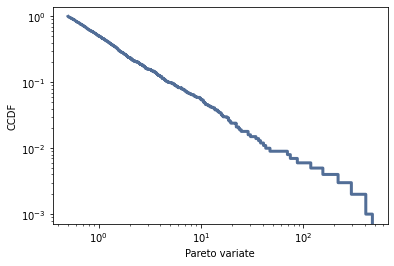

In [39]:
t = [pareto_variate(alpha=1, xm=0.5) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Pareto variate", ylabel="CCDF", xscale="log", yscale="log")

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [41]:
import scipy.stats

In [42]:
mu = 178 #cm
sigma = 7.7 #cm
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [43]:
dist.mean(), dist.std()

(178.0, 7.7)

In [44]:
dist.cdf(mu - sigma)

0.1586552539314574

16% of people are below the mean by more than one standard deviation.

How many people are between 5'10" and 6'1"?

In [45]:
def feet_and_inches_to_cm(feet, inches):
    """
    Convert height in feet and inches to cm.
    """
    inches += feet * 12
    cm = inches * 2.54
    
    return cm

In [46]:
# people below 5'10"
below_5_10 = dist.cdf(feet_and_inches_to_cm(5, 10))

# people below 6'1"
below_6_1 = dist.cdf(feet_and_inches_to_cm(6, 1))

# between 5'10" and 6'1"
below_6_1 - below_5_10

0.34274683763147457

About 34% of people are between 5'10" and 6'1".

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [47]:
alpha = 1.7
xmin = 1  # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

The median height is 1.5 m

In [48]:
dist.mean()

2.428571428571429

The mean height is 2.4 m

In [49]:
dist.cdf(dist.mean())

0.778739697565288

78% of people are shorter than the mean

In [50]:
dist.sf(1000) * 7000000000

55602.97643069972

55,603 people are greater than 1 km in height!

In [51]:
dist.ppf(1 - 1/7e9)

618349.6106759505

In [52]:
scipy.stats.pareto?

Signature:       scipy.stats.pareto(*args, **kwds)
Type:            pareto_gen
String form:     <scipy.stats._continuous_distns.pareto_gen object at 0x7f8f39e9e250>
File:            ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A Pareto continuous random variable.

As an instance of the `rv_continuous` class, `pareto` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(b, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, b, loc=0, scale=1)
    Probability density function.
logpdf(x, b, loc=0, scale=1)
    Log of the probability density function.
cdf(x, b, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, b, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, b, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more 

**Exercise:** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

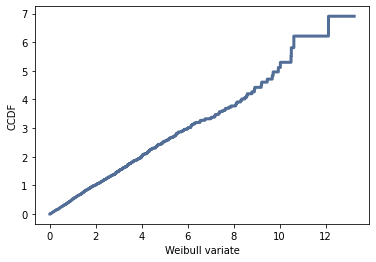

In [151]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform="weibull")
thinkplot.Config(xlabel="Weibull variate", ylabel="CCDF")

In [154]:
def weibull_variate(lam ,k):
    p = random.random()
    x = lam * (-np.log(1 - p))**(1/k)
    return x

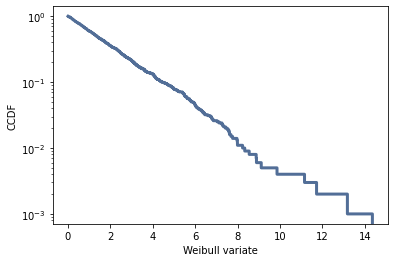

In [155]:
lam = 2
k = 1
t = [weibull_variate(lam, k) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Weibull variate", ylabel="CCDF", yscale="log")

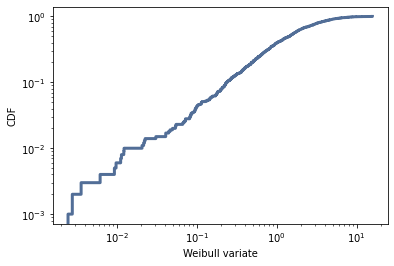

In [145]:
lam = 2
k = 1
t = [weibull_variate(lam, k) for _ in range(1000)]

cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Weibull variate", ylabel="CDF", xscale="log", yscale="log")

**Exercise:** For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [166]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

n = len(diffs)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

1 / lam, np.mean(sample)

(32.72727272727273, 30.58120896123103)

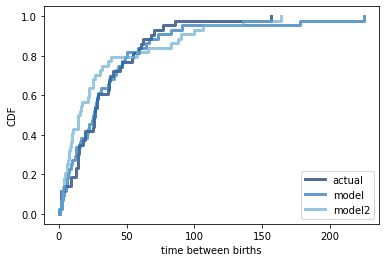

In [176]:
sample = [random.expovariate(lam) for _ in range(44)]
exp_cdf = thinkstats2.Cdf(sample, label="model")

sample2 = [random.expovariate(lam) for _ in range(44)]
exp_cdf2 = thinkstats2.Cdf(sample2, label="model2")

thinkplot.PrePlot(3)
thinkplot.Cdf(cdf)
thinkplot.Cdf(exp_cdf)
thinkplot.Cdf(exp_cdf2)
thinkplot.Config(xlabel="time between births", ylabel="CDF")

Sometimes it matches well and sometimes it doesn't match well.

**Bonus Example:** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

In [178]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

Downloaded hinc.py
Downloaded hinc06.csv


In [179]:
import hinc

df = hinc.ReadData()
df

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640
5,29999.0,6740,36943,0.301679
6,34999.0,6354,43297,0.353566
7,39999.0,5832,49129,0.401191
8,44999.0,5547,54676,0.446488
9,49999.0,5254,59930,0.489392


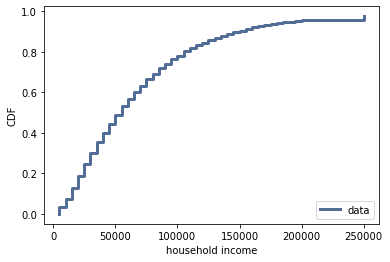

In [180]:
xs, ps = df.income.values, df.ps.values
cdf = thinkstats2.Cdf(xs, ps, label="data")
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label="data")

# linear plot
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="household income", ylabel="CDF")

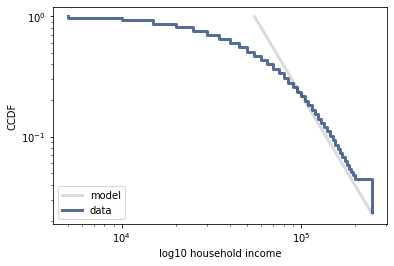

In [181]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, low=0, high=250000)

thinkplot.Plot(xs, 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="log10 household income",
    ylabel="CCDF",
    xscale="log",
    yscale="log",
    loc="lower left",
)

In [182]:
median = cdf_log.Percentile(50)
iqr = cdf_log.Percentile(75) - cdf_log.Percentile(25)
std = iqr / 1.349

# choose std to match the upper tail
std = 0.35
print(median, std)

4.740354793159152 0.35


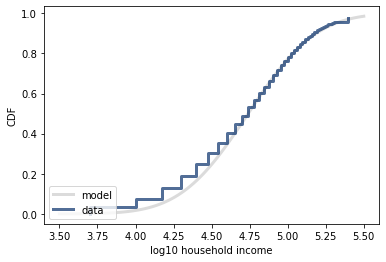

In [183]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 household income", ylabel="CDF")